# Dataset 1 

In [1]:
#importing liberaries 
import pandas as pd


In [2]:
# uploading data set
data = pd.read_csv('dataset1.csv')
data.shape

(925, 8)

In [6]:
# Display the first few rows of the dataset
print(data.head())

   target    var1     var2          var3   var4    var5 var6              var7
0       0  509.18  417.681    Micronesia  138.0  393.00   no  20/07/2019 13:21
1       0  446.06  666.182      Dominica   81.0  352.05  yes  04/04/2019 21:30
2       1  235.50  398.097   Isle of Man   90.0  339.00   no  03/03/2019 02:59
3       0  306.02  518.163  Turkmenistan  102.0  439.25  yes  19/03/2019 08:00
4       0  453.08  600.156      Cameroon  105.0  422.95   no  18/03/2019 13:22


In [7]:
# descriptive statistics of the  dataset
data.describe()

,target,var1,var2,var4,var5
count,925.000000,925.000000,925.000000,325.000000,925.000000
mean,0.496216,360.116562,548.390134,108.452308,325.393946
std,0.500256,87.866662,135.221460,26.325744,78.862779
min,0.000000,209.560000,139.965000,57.000000,163.000000
25%,0.000000,278.640000,467.373000,87.000000,257.900000
50%,0.000000,367.640000,569.841000,105.000000,342.350000
75%,1.000000,437.600000,652.278000,126.000000,393.000000
max,1.000000,539.920000,794.848000,180.000000,457.150000


In [8]:
#columns name
data.columns

Index(['target', 'var1', 'var2', 'var3', 'var4', 'var5', 'var6', 'var7'], dtype='object')

# Handle missing data

In [9]:
# # Ensure the target variable is categorical
# data['target'] = data['target'].astype('category')

In [10]:
# Check for missing values in the dataset
print("Missing data before imputation:")
print(data.isnull().sum())

Missing data before imputation:
target      0
var1        0
var2        0
var3        0
var4      600
var5        0
var6        0
var7        0
dtype: int64


In [11]:
# Impute missing values (mean for numerical, mode for categorical)


for column in data.select_dtypes(include=['float64', 'int64']).columns:
    data[column].fillna(data[column].mean(), inplace=True)

for column in data.select_dtypes(include=['object']).columns:
    data[column].fillna(data[column].mode()[0], inplace=True)
    
print("Missing data after imputation:")
print(data.isnull().sum())

Missing data after imputation:
target    0
var1      0
var2      0
var3      0
var4      0
var5      0
var6      0
var7      0
dtype: int64


# converting categorical features into numerical features using one-hot encoding.

In [12]:
#data type of variables
data.dtypes

target      int64
var1      float64
var2      float64
var3       object
var4      float64
var5      float64
var6       object
var7       object
dtype: object

In [13]:
# Convert categorical variables to numerical using one-hot encoding
data = pd.get_dummies(data, drop_first=True)

# data preprocessing

In [14]:
# Standardize numerical features

from sklearn.preprocessing import LabelEncoder, StandardScaler
numerical_features = data.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

In [15]:
# Display the preprocessed dataset
print("Preprocessed data:")
print(data.head())

Preprocessed data:
     target      var1      var2      var4      var5  var3_Albania  \
0 -0.992461  1.697391 -0.967153  1.896449  0.857726             0   
1 -0.992461  0.978641  0.871575 -1.761962  0.338188             0   
2  1.007596 -1.419013 -1.112060 -1.184318  0.172622             0   
3 -0.992461 -0.616000 -0.223659 -0.414126  1.444505             0   
4 -0.992461  1.058578  0.383030 -0.221578  1.237705             0   

   var3_Algeria  var3_American Samoa  var3_Andorra  var3_Angola  ...  \
0             0                    0             0            0  ...   
1             0                    0             0            0  ...   
2             0                    0             0            0  ...   
3             0                    0             0            0  ...   
4             0                    0             0            0  ...   

   var7_31/03/2019 20:55  var7_31/05/2019 00:58  var7_31/05/2019 02:17  \
0                      0                      0            

In [16]:
# Save the preprocessed dataset to a new file
preprocessed_file_path = "preprocessed_dataset1.csv"
data.to_csv(preprocessed_file_path, index=False)
print(f"\nPreprocessed data saved to {preprocessed_file_path}")


Preprocessed data saved to preprocessed_dataset1.csv


# Fine-tuning of the selected model using GridSearchCV technique.

In [39]:
#from sklearn.model_selection import GridSearchCV

#from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import LabelEncoder

# Load dataset
data = pd.read_csv('preprocessed_dataset1.csv')
X = data.drop('target', axis=1)
y = data['target']

# Convert continuous labels to categorical labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)


# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest model
rf = RandomForestClassifier()

# Define the hyperparameters and their values to be tested
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")

# Evaluate the model on the test set
best_rf = grid_search.best_estimator_
test_score = best_rf.score(X_test, y_test)
print(f"Test Score: {test_score}")

Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: 0.9594594594594594
Test Score: 0.9459459459459459


In [ ]:
#applying PCA technique to reduce the dimentionality eduction to simplify dataset, then the random forest will be trained on the transformed dataset.

In [60]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import LabelEncoder

# Load dataset
data = pd.read_csv('preprocessed_dataset1.csv')
X = data.drop('target', axis=1)
y = data['target']

# Convert continuous labels to categorical labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Initialize the Random Forest model
rf = RandomForestClassifier()

# Define the hyperparameters and their values to be tested
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train_pca, y_train)

# Print the best parameters and the best score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")

# Evaluate the model on the test set
best_rf = grid_search.best_estimator_
test_score = best_rf.score(X_test_pca, y_test)
print(f"Test Score: {test_score}")

Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Score: 0.9554054054054054
Test Score: 0.9567567567567568


In [68]:
# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data[numerical_features])   #(data_scaled)

In [69]:
# Explained variance
print("Explained variance ratio:", pca.explained_variance_ratio_)
# results;it represents the first principle component explains about 0.35% of varience, and the second principle component explains about 0.20% of the varience. Together, they explain only 0.55% of total varience. it is catagorised as high dimentional data which menas that the varience is spread out across many dimentionals, and on single or small set of components can capture most of the information.

Explained variance ratio: [0.55551005 0.17730565]


In [70]:
# Loadings
print("Loadings:", pca.components_)

Loadings: [[ 0.56782612 -0.49646666 -0.36395652  0.25461811 -0.4835283 ]
 [-0.08204933  0.08065855  0.30291347  0.94187079  0.08879728]]


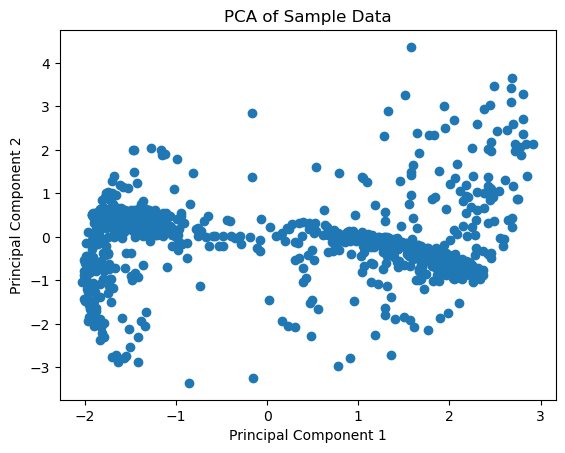

In [71]:
# Plotting the scores
plt.scatter(principal_components[:, 0], principal_components[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Sample Data')
plt.show()

In [72]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import LabelEncoder

# Load dataset
data = pd.read_csv('preprocessed_dataset1.csv')
X = data.drop('target', axis=1)
y = data['target']
# Convert continuous labels to categorical labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Print explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)

# Initialize the Random Forest model
rf = RandomForestClassifier()

# Define the hyperparameters and their values to be tested
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train_pca, y_train)
# Print the best parameters and the best score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")

# Evaluate the model on the test set
best_rf = grid_search.best_estimator_
test_score = best_rf.score(X_test_pca, y_test)
print(f"Test Score: {test_score}")


Explained variance ratio: [3.12218265e-01 1.43751703e-01 1.14302274e-01 7.48038166e-02
 3.99449084e-02 1.92982867e-03 1.72220436e-03 1.71255532e-03
 1.69834930e-03 1.51195771e-03 1.51195771e-03 1.51195771e-03
 1.51195771e-03 1.50994001e-03 1.50868005e-03 1.50058090e-03
 1.49876540e-03 1.47742160e-03 1.46929224e-03 1.29596375e-03
 1.29596375e-03 1.29596375e-03 1.29596375e-03 1.29596375e-03
 1.29596375e-03 1.29596375e-03 1.29596375e-03 1.29596375e-03
 1.29596375e-03 1.29596375e-03 1.29596375e-03 1.29596375e-03
 1.29596375e-03 1.29596375e-03 1.29596375e-03 1.29596375e-03
 1.29596375e-03 1.29596375e-03 1.29596375e-03 1.29596375e-03
 1.29596375e-03 1.29596375e-03 1.29596375e-03 1.29596375e-03
 1.29596375e-03 1.29596375e-03 1.29596375e-03 1.29596375e-03
 1.29596375e-03 1.29596375e-03 1.29596375e-03 1.27393461e-03
 1.26255787e-03 1.26040729e-03 1.25088008e-03 1.24392057e-03
 1.19215593e-03 1.07996979e-03 1.07996979e-03 1.07996979e-03
 1.07996979e-03 1.07996979e-03 1.07996979e-03 1.07996979e-0

# Training random forest model

In [61]:
from sklearn.model_selection import train_test_split

# Check column names
print(data.columns)

# Ensure 'var3' exists in the DataFrame
if 'target' in data.columns:
    # Split the data into training and testing sets
    X = data.drop('target', axis=1)
    y = data['target']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
else:
    print("Error: 'var3' not found in DataFrame columns.")

Index(['target', 'var1', 'var2', 'var4', 'var5', 'var3_Albania',
       'var3_Algeria', 'var3_American Samoa', 'var3_Andorra', 'var3_Angola',
       ...
       'var7_31/03/2019 20:55', 'var7_31/05/2019 00:58',
       'var7_31/05/2019 02:17', 'var7_31/05/2019 06:21',
       'var7_31/05/2019 09:06', 'var7_31/05/2019 11:44',
       'var7_31/05/2019 17:50', 'var7_31/05/2019 21:41',
       'var7_31/05/2019 23:32', 'var7_31/05/2019 23:42'],
      dtype='object', length=1163)


In [75]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [76]:
# Split the data into training and testing sets
X = data.drop('target', axis=1)
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ensure the target variable is of integer type for classification models
y_train = y_train.astype('int')
y_test = y_test.astype('int')

# # Choose a classification model 
# model = LogisticRegression()

# # Train the model
# model.fit(X_train, y_train)

# # Make predictions
# y_pred = model.predict(X_test)

# # Evaluate the model
# print("Model Accuracy:", accuracy_score(y_test, y_pred))
# print("Classification Report:\n", classification_report(y_test, y_pred))

# Choose a classification model (example: Random Forest)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate the model
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Model Accuracy: 0.9567567567567568
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96        97
           1       0.95      0.95      0.95        88

    accuracy                           0.96       185
   macro avg       0.96      0.96      0.96       185
weighted avg       0.96      0.96      0.96       185



In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score

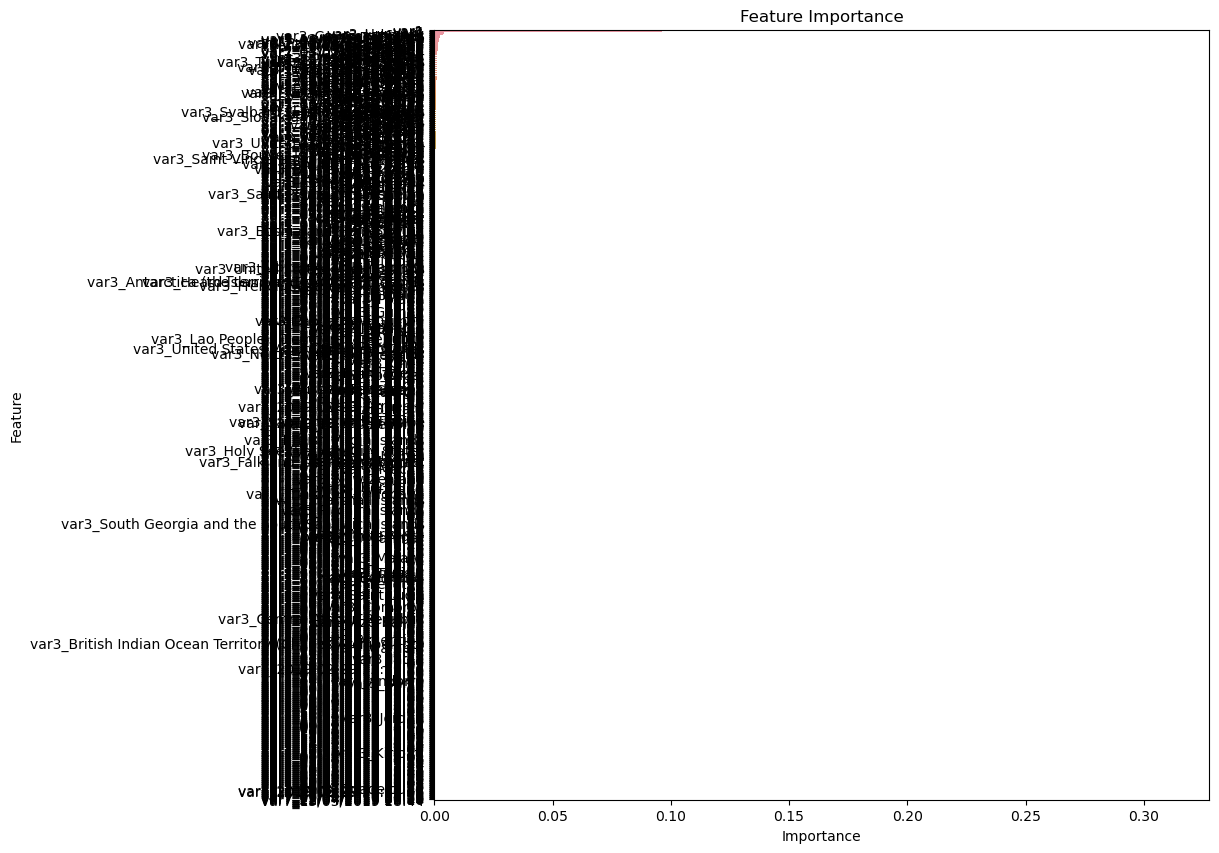

In [82]:
# Feature Importance
feature_importances = model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 10))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.show()

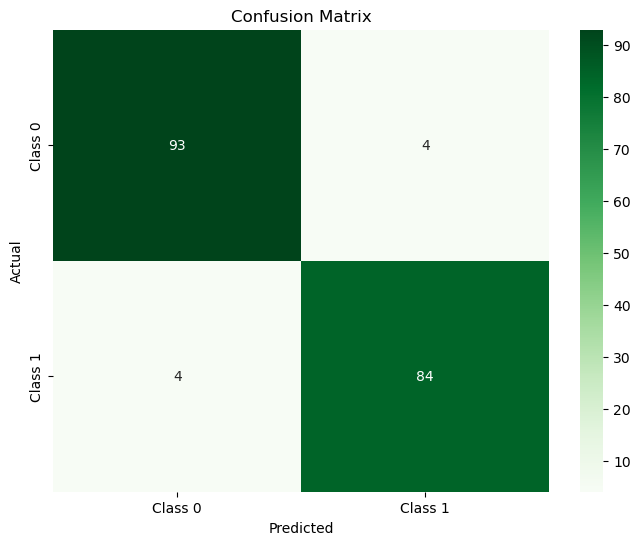

In [66]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

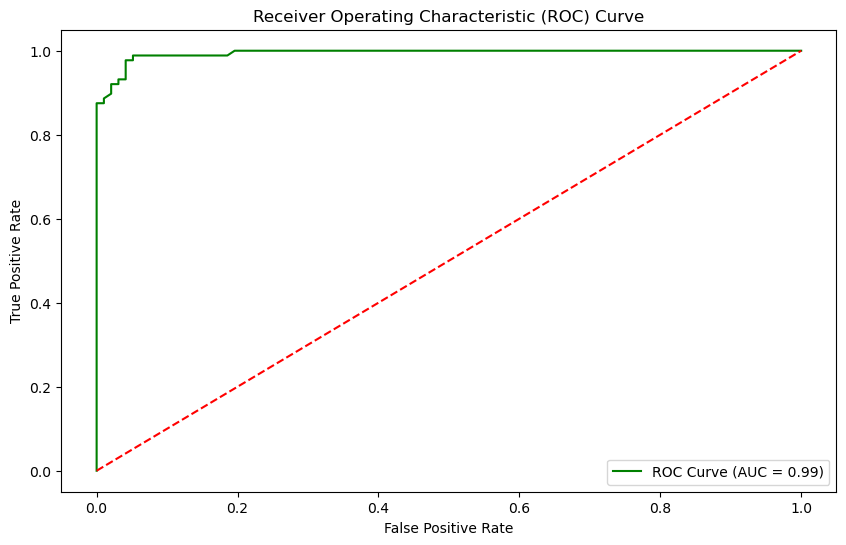

In [67]:
# ROC Curve and AUC Score
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='green', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [47]:
#to inspect target variable 
#weather it is a binary or multiclassification problem 
unique_classes = y.unique()
print(unique_classes)
print("Number of unique classes:", len(unique_classes))
#len(unique_classes) is 2 it means it is a binary classification problem 
# if result would have been more than 2 then it should have been multiclass classification pproblem

[-0.99246085  1.00759642]
Number of unique classes: 2
